# Cloud performance variability prediction#

In [2]:
import csv
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import datetime as dt
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import os

In [3]:
!git clone https://github.com/guillemr/robust-fpop
!R CMD build robust-fpop
!R CMD INSTALL robseg_*.tar.gz

fatal: destination path 'robust-fpop' already exists and is not an empty directory.
* checking for file ‘robust-fpop/DESCRIPTION’ ... OK
* preparing ‘robseg’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘robseg_2019.07.02.tar.gz’

* installing to library ‘/Users/zhaoyuxuan/Library/R/3.5/library’
* installing *source* package ‘robseg’ ...
** libs
x86_64-apple-darwin13.4.0-clang++  -I"/Users/zhaoyuxuan/anaconda3/lib/R/include" -DNDEBUG   -D_FORTIFY_SOURCE=2 -mmacosx-version-min=10.9 -I/Users/zhaoyuxuan/anaconda3/include   -fPIC  -march=core2 -mtune=haswell -mssse3 -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -stdlib=libc++ -fvisibility-inlines-hidden  -fmessage-length=0 -I/Users/zhaoyuxuan/anaconda3/include -fdebug-prefix-map==/usr/local/src/conda/- -fdebug-prefix-map==/usr/local/src/conda-prefix  -c BinSeg_MultiDim.cpp -o 

In [29]:
robjects.r("install.packages('changepoint', lib = '/usr/local/lib/R/site-library')")
robseg = importr('robseg')
robjects.r.source("robust-fpop/Simulation.R");

Would you like to use a personal library instead? (yes/No/cancel) yes
--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Australia (Perth) [https]
 6: Austria [https]
 7: Belgium (Ghent) [https]
 8: Brazil (BA) [https]
 9: Brazil (PR) [https]
10: Brazil (RJ) [https]
11: Brazil (SP 1) [https]
12: Brazil (SP 2) [https]
13: Bulgaria [https]
14: China (Beijing 1) [https]
15: China (Beijing 2) [https]
16: China (Hong Kong) [https]
17: China (Guangzhou) [https]
18: China (Lanzhou) [https]
19: China (Nanjing) [https]
20: China (Shanghai 1) [https]
21: Colombia (Cali) [https]
22: Costa Rica [https]
23: Denmark [https]
24: East Asia [https]
25: Ecuador (Cuenca) [https]
26: Ecuador (Quito) [https]
27: France (Lyon 1) [https]
28: France (Lyon 2) [https]
29: France (Marseille) [https]
30: Germany (Erlangen) [https]
31: Germany (Münster) [ht







	‘/private/var/folders/ww/yw670kws4sq8vqphp5v56df40000gn/T/RtmpUJNjrV/downloaded_packages’



In [7]:
import os
dict = {}

source_dir = './cloudlab-benchmarks-osdi18-data-and-nodebooks/data/raw-data/'
for f in os.listdir(source_dir):
    if ".csv" in f:
        dict[os.path.splitext(f)[0]] = pd.read_csv(source_dir + f)

In [8]:
dict['disk_info'].T

,0,1,2,3,4,5,6,7,8,9,...,17699,17700,17701,17702,17703,17704,17705,17706,17707,17708
run_uuid,d29989cd-c414-4af5-b04f-f29561b0240d,a3d37542-7bf9-468f-a630-700715c9b1ff,a3d37542-7bf9-468f-a630-700715c9b1ff,368d9894-c37f-49de-a073-3cab47f69a3a,368d9894-c37f-49de-a073-3cab47f69a3a,9fbcd3b2-c23e-4e6c-a19b-54344b48890b,9fbcd3b2-c23e-4e6c-a19b-54344b48890b,9fbcd3b2-c23e-4e6c-a19b-54344b48890b,b8753918-c049-4bf7-966e-d16b26e6de12,b8753918-c049-4bf7-966e-d16b26e6de12,...,fc1aaa02-de9f-43ec-99cf-1c548904b435,fc1aaa02-de9f-43ec-99cf-1c548904b435,d0932a2b-914d-4461-adf1-b46d4c01ccc9,d0932a2b-914d-4461-adf1-b46d4c01ccc9,d0932a2b-914d-4461-adf1-b46d4c01ccc9,db427808-47f3-4599-9a24-3973c4425788,d2731139-52e3-4697-a0bc-a8a6beab0255,b1389312-a648-4e87-9046-085644802b02,b23f3655-2293-4be7-8cd0-be41ab0357be,faf52960-818e-48e1-88d0-2bf58bfa0771
timestamp,1495271912,1495272018,1495272018,1495272078,1495272078,1495272065,1495272065,1495272065,1495272056,1495272056,...,1522852581,1522852581,1522852581,1522852581,1522852581,1522865516,1522865516,1522865512,1522865513,1522865528
nodeid,ms0225,clnode123,clnode123,clnode102,clnode102,c220g2-010817,c220g2-010817,c220g2-010817,c220g1-030808,c220g1-030808,...,c220g2-011301,c220g2-011301,c220g2-011320,c220g2-011320,c220g2-011320,ms0134,ms0107,ms0839,ms0802,ms0238
nodeuuid,68285417-72da-11e4-85c8-179a28bd1b8c,cedf924b-fee2-11e5-ba07-000099989701,cedf924b-fee2-11e5-ba07-000099989701,f2537c2f-fee1-11e5-ba07-000099989701,f2537c2f-fee1-11e5-ba07-000099989701,21b9599e-e772-11e5-a488-a3bb994732a6,21b9599e-e772-11e5-a488-a3bb994732a6,21b9599e-e772-11e5-a488-a3bb994732a6,fcfbab77-2931-11e6-8934-779211246dcb,fcfbab77-2931-11e6-8934-779211246dcb,...,1c88d71c-e8ec-11e5-a488-a3bb994732a6,1c88d71c-e8ec-11e5-a488-a3bb994732a6,1a13de4c-e8ec-11e5-a488-a3bb994732a6,1a13de4c-e8ec-11e5-a488-a3bb994732a6,1a13de4c-e8ec-11e5-a488-a3bb994732a6,466b2b8c-72d5-11e4-85c8-179a28bd1b8c,43cc585a-72d5-11e4-85c8-179a28bd1b8c,cd9b0d15-8fbf-11e6-8c08-a53a3a50acf8,e218b7a2-8f4b-11e6-8c08-a53a3a50acf8,66ea8663-72da-11e4-85c8-179a28bd1b8c
disk_name,/dev/sda,/dev/sdb,/dev/sda,/dev/sdb,/dev/sda,/dev/sdb,/dev/sdc,/dev/sda,/dev/sdb,/dev/sdc,...,/dev/sdc,/dev/sda,/dev/sdb,/dev/sdc,/dev/sda,/dev/sda,/dev/sda,/dev/nvme0n1,/dev/nvme0n1,/dev/sda
disk_model,XR0120GEBLT,ST91000640NS,ST91000640NS,ST91000640NS,ST91000640NS,HUC101212CSS600,INTEL SSDSC2BB48,HUC101212CSS600,ST1200MM0007,INTEL SSDSC2BB48,...,INTEL SSDSC2BB48,HUC101212CSS600,HUC101212CSS600,INTEL SSDSC2BB48,HUC101212CSS600,XR0120GEBLT,XR0120GEBLT,THNSN5256GPU7 TOSHIBA,THNSN5256GPU7 TOSHIBA,XR0120GEBLT
disk_serial,14230C9CD4C4,9XG9FW2C,9XG9MB8Q,9XG9MA8Z,9XG9L6T1,5000cca072a93574,BTWL5235053V480QGN,5000cca072aa1bc4,5000c5007de1e3af,CVWL4442017V480QGN,...,PHWL538201SN480QGN,5000cca072a924f0,5000cca072aa2014,PHWL538201JS480QGN,5000cca0729af008,14230C9CDEEE,14230C9CDED0,563S1002TUFV,563S1021TUFV,14230C9CDA59
disk_size,111.8G,931.5G,931.5G,931.5G,931.5G,1.1T,447.1G,1.1T,1.1T,447.1G,...,447.1G,1.1T,1.1T,447.1G,1.1T,111.8G,111.8G,238.5G,238.5G,111.8G
npartitions,3,0,4,0,4,0,0,4,0,0,...,0,4,0,0,4,3,3,4,4,3
disk_type,SSD,HDD,HDD,HDD,HDD,HDD,SSD,HDD,HDD,SSD,...,SSD,HDD,HDD,SSD,HDD,SSD,SSD,SSD,SSD,SSD


In [9]:
dict['disk_results'].T

,0,1,2,3,4,5,6,7,8,9,...,141398,141399,141400,141401,141402,141403,141404,141405,141406,141407
run_uuid,d29989cd-c414-4af5-b04f-f29561b0240d,d29989cd-c414-4af5-b04f-f29561b0240d,d29989cd-c414-4af5-b04f-f29561b0240d,d29989cd-c414-4af5-b04f-f29561b0240d,d29989cd-c414-4af5-b04f-f29561b0240d,d29989cd-c414-4af5-b04f-f29561b0240d,d29989cd-c414-4af5-b04f-f29561b0240d,d29989cd-c414-4af5-b04f-f29561b0240d,a3d37542-7bf9-468f-a630-700715c9b1ff,a3d37542-7bf9-468f-a630-700715c9b1ff,...,b23f3655-2293-4be7-8cd0-be41ab0357be,b23f3655-2293-4be7-8cd0-be41ab0357be,faf52960-818e-48e1-88d0-2bf58bfa0771,faf52960-818e-48e1-88d0-2bf58bfa0771,faf52960-818e-48e1-88d0-2bf58bfa0771,faf52960-818e-48e1-88d0-2bf58bfa0771,faf52960-818e-48e1-88d0-2bf58bfa0771,faf52960-818e-48e1-88d0-2bf58bfa0771,faf52960-818e-48e1-88d0-2bf58bfa0771,faf52960-818e-48e1-88d0-2bf58bfa0771
timestamp,1495271912,1495271912,1495271912,1495271912,1495271912,1495271912,1495271912,1495271912,1495272018,1495272018,...,1522865513,1522865513,1522865528,1522865528,1522865528,1522865528,1522865528,1522865528,1522865528,1522865528
nodeid,ms0225,ms0225,ms0225,ms0225,ms0225,ms0225,ms0225,ms0225,clnode123,clnode123,...,ms0802,ms0802,ms0238,ms0238,ms0238,ms0238,ms0238,ms0238,ms0238,ms0238
nodeuuid,68285417-72da-11e4-85c8-179a28bd1b8c,68285417-72da-11e4-85c8-179a28bd1b8c,68285417-72da-11e4-85c8-179a28bd1b8c,68285417-72da-11e4-85c8-179a28bd1b8c,68285417-72da-11e4-85c8-179a28bd1b8c,68285417-72da-11e4-85c8-179a28bd1b8c,68285417-72da-11e4-85c8-179a28bd1b8c,68285417-72da-11e4-85c8-179a28bd1b8c,cedf924b-fee2-11e5-ba07-000099989701,cedf924b-fee2-11e5-ba07-000099989701,...,e218b7a2-8f4b-11e6-8c08-a53a3a50acf8,e218b7a2-8f4b-11e6-8c08-a53a3a50acf8,66ea8663-72da-11e4-85c8-179a28bd1b8c,66ea8663-72da-11e4-85c8-179a28bd1b8c,66ea8663-72da-11e4-85c8-179a28bd1b8c,66ea8663-72da-11e4-85c8-179a28bd1b8c,66ea8663-72da-11e4-85c8-179a28bd1b8c,66ea8663-72da-11e4-85c8-179a28bd1b8c,66ea8663-72da-11e4-85c8-179a28bd1b8c,66ea8663-72da-11e4-85c8-179a28bd1b8c
testname,randwrite,randread,randwrite,write,randread,read,read,write,randread,read,...,read,randwrite,randwrite,randread,randwrite,write,randread,read,read,write
runtime,720.002,105.565,720.283,720.002,140.652,56.591,138.604,88.733,720.006,91.037,...,63.39,15.824,720.003,105.962,720.317,720.001,140.03,55.047,138.682,87.561
size,1.4021e+06,1.04858e+07,1.41308e+06,1.40205e+06,1.04858e+07,1.04858e+07,1.04858e+07,1.04858e+07,436284,1.04858e+07,...,1.04858e+07,1.04858e+07,1.41186e+06,1.04858e+07,1.42291e+06,1.41267e+06,1.04858e+07,1.04858e+07,1.04858e+07,1.04858e+07
max,2024,172912,2023,2011,102976,190536,77352,122304,752,121544,...,176960,776616,2000,176656,2015,2000,103976,195185,77088,122059
min,1832,7,0,1896,25928,180096,73408,109768,262,95235,...,138608,460688,1780,7,0,1896,25672,182440,72904,112896
mean,1949.05,98894.2,1961.17,1948.92,74530,185430,75659.6,118267,606.078,115254,...,165450,661000,1962.66,98654.2,1975.46,1963.71,74884.6,190613,75617.2,119856


In [10]:
# dict['env_info'].T

In [11]:
# dict['fio_info'].T

In [12]:
# dict['iperf3_info'].T

In [13]:
# dict['iperf3_results'].T

In [14]:
# dict['mem_results'].T

In [15]:
# dict['membench_info'].T

In [16]:
# dict['network_info'].T

In [17]:
# dict['ping_info'].T

In [18]:
# dict['ping_results'].T

In [19]:
# dict['stream_info'].T

In [20]:
raw_disk = pd.merge(dict['disk_results'], dict['env_info'], 
                on=['run_uuid','nodeid','nodeuuid','timestamp'])
raw_disk['disk_name'] = raw_disk['device'].apply(lambda x: x.rstrip(string.digits) if 'nvm' not in x else x[:-2])
raw_disk['disk_name'].unique()
raw_disk = pd.merge(raw_disk, dict['disk_info'], 
                on=['run_uuid','timestamp','nodeuuid','disk_name','nodeid'])
raw_disk['disk_size'] = raw_disk['disk_size'].apply(lambda x: x.lstrip())

In [21]:
raw_disk.T

,0,1,2,3,4,5,6,7,8,9,...,141398,141399,141400,141401,141402,141403,141404,141405,141406,141407
run_uuid,d29989cd-c414-4af5-b04f-f29561b0240d,d29989cd-c414-4af5-b04f-f29561b0240d,d29989cd-c414-4af5-b04f-f29561b0240d,d29989cd-c414-4af5-b04f-f29561b0240d,d29989cd-c414-4af5-b04f-f29561b0240d,d29989cd-c414-4af5-b04f-f29561b0240d,d29989cd-c414-4af5-b04f-f29561b0240d,d29989cd-c414-4af5-b04f-f29561b0240d,a3d37542-7bf9-468f-a630-700715c9b1ff,a3d37542-7bf9-468f-a630-700715c9b1ff,...,b23f3655-2293-4be7-8cd0-be41ab0357be,b23f3655-2293-4be7-8cd0-be41ab0357be,faf52960-818e-48e1-88d0-2bf58bfa0771,faf52960-818e-48e1-88d0-2bf58bfa0771,faf52960-818e-48e1-88d0-2bf58bfa0771,faf52960-818e-48e1-88d0-2bf58bfa0771,faf52960-818e-48e1-88d0-2bf58bfa0771,faf52960-818e-48e1-88d0-2bf58bfa0771,faf52960-818e-48e1-88d0-2bf58bfa0771,faf52960-818e-48e1-88d0-2bf58bfa0771
timestamp,1495271912,1495271912,1495271912,1495271912,1495271912,1495271912,1495271912,1495271912,1495272018,1495272018,...,1522865513,1522865513,1522865528,1522865528,1522865528,1522865528,1522865528,1522865528,1522865528,1522865528
nodeid,ms0225,ms0225,ms0225,ms0225,ms0225,ms0225,ms0225,ms0225,clnode123,clnode123,...,ms0802,ms0802,ms0238,ms0238,ms0238,ms0238,ms0238,ms0238,ms0238,ms0238
nodeuuid,68285417-72da-11e4-85c8-179a28bd1b8c,68285417-72da-11e4-85c8-179a28bd1b8c,68285417-72da-11e4-85c8-179a28bd1b8c,68285417-72da-11e4-85c8-179a28bd1b8c,68285417-72da-11e4-85c8-179a28bd1b8c,68285417-72da-11e4-85c8-179a28bd1b8c,68285417-72da-11e4-85c8-179a28bd1b8c,68285417-72da-11e4-85c8-179a28bd1b8c,cedf924b-fee2-11e5-ba07-000099989701,cedf924b-fee2-11e5-ba07-000099989701,...,e218b7a2-8f4b-11e6-8c08-a53a3a50acf8,e218b7a2-8f4b-11e6-8c08-a53a3a50acf8,66ea8663-72da-11e4-85c8-179a28bd1b8c,66ea8663-72da-11e4-85c8-179a28bd1b8c,66ea8663-72da-11e4-85c8-179a28bd1b8c,66ea8663-72da-11e4-85c8-179a28bd1b8c,66ea8663-72da-11e4-85c8-179a28bd1b8c,66ea8663-72da-11e4-85c8-179a28bd1b8c,66ea8663-72da-11e4-85c8-179a28bd1b8c,66ea8663-72da-11e4-85c8-179a28bd1b8c
testname,randwrite,randread,randwrite,write,randread,read,read,write,randread,read,...,read,randwrite,randwrite,randread,randwrite,write,randread,read,read,write
runtime,720.002,105.565,720.283,720.002,140.652,56.591,138.604,88.733,720.006,91.037,...,63.39,15.824,720.003,105.962,720.317,720.001,140.03,55.047,138.682,87.561
size,1.4021e+06,1.04858e+07,1.41308e+06,1.40205e+06,1.04858e+07,1.04858e+07,1.04858e+07,1.04858e+07,436284,1.04858e+07,...,1.04858e+07,1.04858e+07,1.41186e+06,1.04858e+07,1.42291e+06,1.41267e+06,1.04858e+07,1.04858e+07,1.04858e+07,1.04858e+07
max,2024,172912,2023,2011,102976,190536,77352,122304,752,121544,...,176960,776616,2000,176656,2015,2000,103976,195185,77088,122059
min,1832,7,0,1896,25928,180096,73408,109768,262,95235,...,138608,460688,1780,7,0,1896,25672,182440,72904,112896
mean,1949.05,98894.2,1961.17,1948.92,74530,185430,75659.6,118267,606.078,115254,...,165450,661000,1962.66,98654.2,1975.46,1963.71,74884.6,190613,75617.2,119856


In [22]:
exclude_ids = []
for idx, grp in raw_disk.groupby(["site", "hw_type", "device", "disk_type", "disk_model", "disk_size"]):
#     print(idx, len(grp))
    if len(grp)< 200:
        exclude_ids.extend(grp.index.values)
disk = raw_disk.drop(exclude_ids, inplace=False)
# Exclude measurements on or after April 2, 2018
disk = disk[disk["timestamp"] <= 1522636071]
disk = disk[disk["run_success"] != 0]

In [23]:
len(disk)

139864

In [24]:
print(disk.hw_type.value_counts())

c220g2    36560
m400      28528
c8220     27872
c220g1    19000
m510      16048
c6320     11856
Name: hw_type, dtype: int64


In [25]:
def cpd_indiv(hw_type, df, lthreshold):
    
    global processed_configs_count
    
    for idx, grp in df.groupby(factor_list):
        
        # Do not consider subsets that include less than 200 measurements
        if len(grp) < 200:
            continue
            
        processed_configs_count += 1

        vals = grp[metric].values
        timestmaps = grp.timestamp.values
        vals_str = ",".join([str(el) for el in vals])
        # Create a list with these values and pass it into the R environment
        robjects.r("x.data <- c(%s)" % (vals_str))

        # Run CPD with the selected threshold
        res=robjects.r("""
            est.sd <- varDiff(x.data)
            res.ou <- fpop_intern(x.data/est.sd,  test.stat="Outlier", pen.value=2*log(length(x.data)), lthreshold=%f)
            cpt <- res.ou$cpts[-length(res.ou$cpts)]
            """ % lthreshold)

        mean_vals = robjects.r("res.ou$smt.signal * est.sd") 
        for v in robjects.r("cpt"):
            # For each changepoint, estimate the corresponding change in means (relative change, %)
            percent_change = (mean_vals[v] - mean_vals[v-1]) / mean_vals[v-1] * 100.0
            indiv_cps.loc[len(indiv_cps)] = [hw_type, "%.2f" % lthreshold] + [str(x) for x in list(idx)] + [timestmaps[v], percent_change] 

        # Estimate legths of segments, in seconds
        timestmaps_min = timestmaps.min()
        timestmaps_max = timestmaps.max()
        if len(robjects.r("cpt")) == 0:
            segment_lengths = [timestmaps_max-timestmaps_min]
        elif len(robjects.r("cpt")) == 1:
            segment_lengths = [timestmaps[robjects.r("cpt")[0]]-timestmaps_min, timestmaps_max-timestmaps[robjects.r("cpt")[0]]]
        else:
            segment_lengths = [timestmaps[robjects.r("cpt")[0]]-timestmaps_min, timestmaps_max-timestmaps[robjects.r("cpt")[-1]]]
            for cpt_idx in range(len(robjects.r("cpt")))[1:]:
                  segment_lengths.append(timestmaps[robjects.r("cpt")[cpt_idx]]-timestmaps[robjects.r("cpt")[cpt_idx-1]])
        for sl in segment_lengths:
            indiv_durations.loc[len(indiv_durations)] = [hw_type, "%.2f" % lthreshold] + [str(x) for x in list(idx)] + [sl / (3600.0 * 24)] 

In [26]:
def cpd_aggr():
    """ 
    Run cpd_indiv() a bunch of times and aggregate/save results; repeat for different CPD thresholds.
    This function will be reused for memory and disk CPD. 
    """
    global processed_configs_count
    global total_measurements

    for hw_type, hw_type_grp in df.groupby("hw_type"):

        print ("\nProcessing hw_type:", hw_type)
        total_measurements += len(hw_type_grp)

        processed_config_count = 0
        for idx, grp in hw_type_grp.groupby(factor_list):
            if len(grp) >= 200:
                processed_config_count += 1

        meta_df.loc[len(meta_df)] = [hw_type, len(hw_type_grp), processed_config_count,
                                            hw_type_grp.timestamp.min(), hw_type_grp.timestamp.max()]
         
        for lthreshold in lthreshold_list:  
      
            # Run the analysis for selected configuration
            cpd_indiv(hw_type, hw_type_grp, lthreshold)

        print ("Processed configs:", processed_configs_count)
        print ("Processed measurements:", total_measurements)

    meta_df.to_csv("%s/meta" % (dest_dir), index=False)
    indiv_durations.to_csv("%s/segment-durations" % (dest_dir), index=False)

    for lthreshold, grp in indiv_cps.groupby("lthreshold"):
        
        grp.to_csv("%s/indiv-%.2f" % (dest_dir, float(lthreshold)), index=False)

        aggr_df = pd.DataFrame()
        for hw, subgrp in grp.groupby("hw_type"):
            
            # Working only for CPU data/factor_list
            #configs_str = (subgrp["testname"] + "-" + subgrp["total_threads"] + "-" + subgrp["dvfs"]+ "-" + subgrp["socket_num"] + ";").tolist()
            # More general version: 
            configs_str = ["-".join(x.values)+";" for idx, x in subgrp[factor_list].astype(str).iterrows()]

            timeline = pd.DataFrame({"configs": configs_str,
                                    "direction": subgrp.percent_change.apply(lambda x: "U" if x > 0 else "D").tolist(),
                                    "percent_changes": subgrp.percent_change.apply(lambda x: str(x) + ";").tolist()},
                                    index=pd.to_datetime(subgrp.timestamp, unit='s'))
            t_count = timeline.resample('D').sum()
            t_count["count"] = t_count["configs"].apply(lambda x: len(str(x).split(";"))-1)
            t_count["hw_type"] = hw
            aggr_df = pd.concat([aggr_df, t_count])

        aggr_df.to_csv("%s/aggr-%.2f" % (dest_dir, float(lthreshold)))

In [27]:
df = disk
factor_list = ["testname","device","iodepth"]
metric = "mean"

dest_dir = "./disk_cpd"
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

lthreshold_list = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

meta_df = pd.DataFrame(columns=["hw_type", "total_measurements", "configurations", 
                                    "start_timestamp", "end_timestamp"])
indiv_cps = pd.DataFrame(columns = ["hw_type", "lthreshold"] + 
                  factor_list +  
                  ["timestamp", "percent_change"])
indiv_durations = pd.DataFrame(columns = ["hw_type", "lthreshold"] + 
                                     factor_list +  
                                     ["segment_duration"])

processed_configs_count = 0
total_measurements = 0

In [30]:
cpd_aggr()


Processing hw_type: c220g1
Processed configs: 193
Processed measurements: 38000

Processing hw_type: c220g2
Processed configs: 385
Processed measurements: 74560

Processing hw_type: c6320
Processed configs: 513
Processed measurements: 86416

Processing hw_type: c8220
Processed configs: 641
Processed measurements: 114288

Processing hw_type: m400
Processed configs: 705
Processed measurements: 142816

Processing hw_type: m510
Processed configs: 769
Processed measurements: 158864


In [31]:
cpd = {}
cpd["disk"] = {}
result_dir = "disk_cpd"
for f in os.listdir(result_dir):
    if f[:2] != "._":
        print("Loading:%s/%s" %(result_dir,f))
        df = pd.read_csv("%s/%s" %(result_dir,f))
        print(len(df))
        
        if "aggr" in f:
            lthreshold = float(f.split("-")[1])
            df["lthreshold"] = lthreshold
            if "aggr" not in cpd["disk"].keys():
                cpd["disk"]["aggr"] = pd.DataFrame()
            cpd["disk"]["aggr"] = pd.concat([cpd["disk"]["aggr"], df], sort=False)
            
        if "indiv" in f:
            if "indiv" not in cpd["disk"].keys():
                cpd["disk"]["indiv"] = pd.DataFrame()
                cpd["disk"]["indiv"] = pd.concat([cpd["disk"]["indiv"], df], sort=False)

        if "meta" in f:
            cpd["disk"]["meta"] = df
            
        if "segment-durations" in f:
            cpd["disk"]["segment-durations"] = df


Loading:disk_cpd/indiv-0.70
25
Loading:disk_cpd/aggr-1.00
1160
Loading:disk_cpd/indiv-0.40
5
Loading:disk_cpd/aggr-0.90
986
Loading:disk_cpd/aggr-0.70
289
Loading:disk_cpd/indiv-1.00
76
Loading:disk_cpd/aggr-0.40
80
Loading:disk_cpd/meta
7
Loading:disk_cpd/indiv-0.90
57
Loading:disk_cpd/indiv-0.80
39
Loading:disk_cpd/aggr-0.50
112
Loading:disk_cpd/segment-durations
995
Loading:disk_cpd/aggr-0.60
235
Loading:disk_cpd/aggr-0.80
759
Loading:disk_cpd/indiv-0.50
10
Loading:disk_cpd/indiv-0.60
15


In [32]:
cpd["disk"]["segment-durations"].lthreshold.value_counts()

1.0    172
0.9    153
0.8    135
0.7    121
0.6    111
0.5    106
0.4    101
0.3     96
Name: lthreshold, dtype: int64

In [33]:
cpd["disk"]["aggr"].hw_type.value_counts()

c220g2    1183
c8220      695
c220g1     695
m510       496
c6320      345
m400       207
Name: hw_type, dtype: int64

In [34]:
cpd["disk"]["meta"]

,hw_type,total_measurements,configurations,start_timestamp,end_timestamp
0,c220g1,19000,24,1495272056,1522621977
1,c220g1,19000,24,1495272056,1522621977
2,c220g2,36560,24,1495272065,1522622172
3,c6320,11856,16,1495272018,1522565352
4,c8220,27872,16,1495457110,1522630140
5,m400,28528,8,1495271912,1522627922
6,m510,16048,8,1495476412,1522627939


In [44]:
count_df = pd.DataFrame(columns=[ "Disk: CP #", 
                                 "Disk: Conf #", 
                                 "Disk: Per Conf"])
for lthreshold in cpd["disk"]["indiv"]["lthreshold"].sort_values().unique():

  disk_cpd_c = len(cpd["disk"]["indiv"][(cpd["disk"]["indiv"]["lthreshold"] == lthreshold)])

  disk_conf_c = cpd["disk"]["meta"].configurations.sum() * 1.0

  disk_r = disk_cpd_c/disk_conf_c

  count_df.loc[lthreshold] = (disk_cpd_c, 
                              disk_conf_c,
                              disk_r)


display(count_df)

,Disk: CP #,Disk: Conf #,Disk: Per Conf
0.7,25.0,120.0,0.208333


This is how many changepoints we have found for different values of lthreshold:


/Users/zhaoyuxuan/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.7, right=0.7
  ax.set_xlim(left, right)
/Users/zhaoyuxuan/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.7, right=0.7
  ax.set_xlim(left, right)


,Disk: CP #,Total #
0.7,25.0,25.0


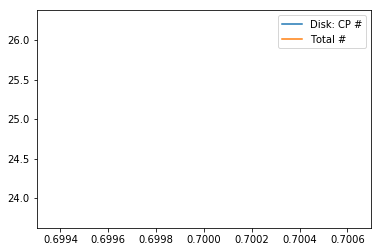

In [45]:
counts = count_df[["Disk: CP #"]].copy()
counts["Total #"] = counts.sum(axis=1)

print("This is how many changepoints we have found for different values of lthreshold:")
counts.plot()
display(counts)